In [1]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import pandas as pd
import seaborn as sns; sns.set_style("dark")
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%cd ..

/workspace/asurion_f22_muby


In [4]:
seven_day = pd.read_csv("fe_data_v2/7_day_churn_data/train_7d_encoded.csv")
thirty_day = pd.read_csv("fe_data_v2/30_day_churn_data/train_30d_encoded.csv")
ninety_day = pd.read_csv("fe_data_v2/90_day_churn_data/train_90d_encoded.csv")

In [5]:
seven_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85707 entries, 0 to 85706
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          85707 non-null  object 
 1   quality_sale                85707 non-null  int64  
 2   seven_day_churn             85707 non-null  float64
 3   clndr_dt_cst                85707 non-null  object 
 4   start_dt                    85707 non-null  object 
 5   lines                       85707 non-null  int64  
 6   previous_tech_support_call  85707 non-null  int64  
 7   account_tenure              85707 non-null  int64  
 8   past_yr_claim_count         85707 non-null  int64  
 9   num_decline                 85707 non-null  int64  
 10  exp                         85707 non-null  int64  
 11  product_type                85707 non-null  object 
 12  pmake                       85707 non-null  object 
 13  claritas_hh_count           857

### 7 day churn Hourly Analysis

In [6]:
hour_df = seven_day.groupby(["time_of_day","seven_day_churn"], as_index = False).size()

In [7]:
hour_df = hour_df.pivot_table(index = "time_of_day", values = "size", columns = "seven_day_churn")
hour_df = hour_df.fillna(0)
hour_df["total_calls"] = hour_df[0] + hour_df[1]
hour_df["prop_accepted"] = hour_df.loc[:,1]/(hour_df.loc[:,0] + hour_df.loc[:,1])
hour_df["time_of_day"] = hour_df.index
hour_df = hour_df.reset_index(drop = True)
hour_df = hour_df.rename_axis(None, axis=1)

In [8]:
mmscale = MinMaxScaler()

In [9]:
hour_df["total_prop"] = mmscale.fit_transform(np.array(hour_df["total_calls"]).reshape(-1,1))

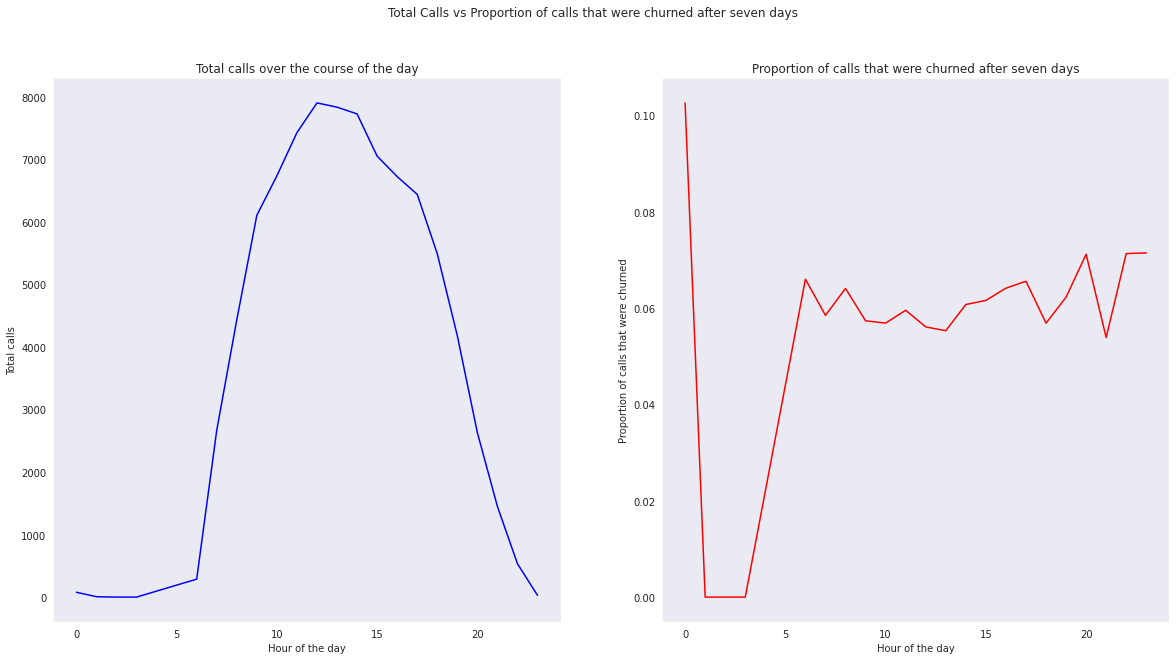

In [10]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20,10))
fig.suptitle('Total Calls vs Proportion of calls that were churned after seven days')

sns.lineplot(ax = ax1, x = "time_of_day", y = "total_calls", data = hour_df, color = "blue");
ax1.set_ylabel('Total calls');
ax1.set_xlabel('Hour of the day');
ax1.set_title('Total calls over the course of the day');

sns.lineplot(ax = ax2, x = "time_of_day", y = "prop_accepted", data = hour_df, color = "red");
ax2.set_ylabel('Proportion of calls that were churned');
ax2.set_xlabel('Hour of the day');
ax2.set_title('Proportion of calls that were churned after seven days');

In [11]:
fig.savefig("call7.png")

### 30 day Churn Hourly Analysis

In [12]:
hour_df = thirty_day.groupby(["time_of_day","thirty_day_churn"], as_index = False).size()

In [13]:
hour_df = hour_df.pivot_table(index = "time_of_day", values = "size", columns = "thirty_day_churn")
hour_df = hour_df.fillna(0)
hour_df["total_calls"] = hour_df[0] + hour_df[1]
hour_df["prop_accepted"] = hour_df.loc[:,1]/(hour_df.loc[:,0] + hour_df.loc[:,1])
hour_df["time_of_day"] = hour_df.index
hour_df = hour_df.reset_index(drop = True)
hour_df = hour_df.rename_axis(None, axis=1)

In [14]:
mmscale = MinMaxScaler()

In [15]:
hour_df["total_prop"] = mmscale.fit_transform(np.array(hour_df["total_calls"]).reshape(-1,1))

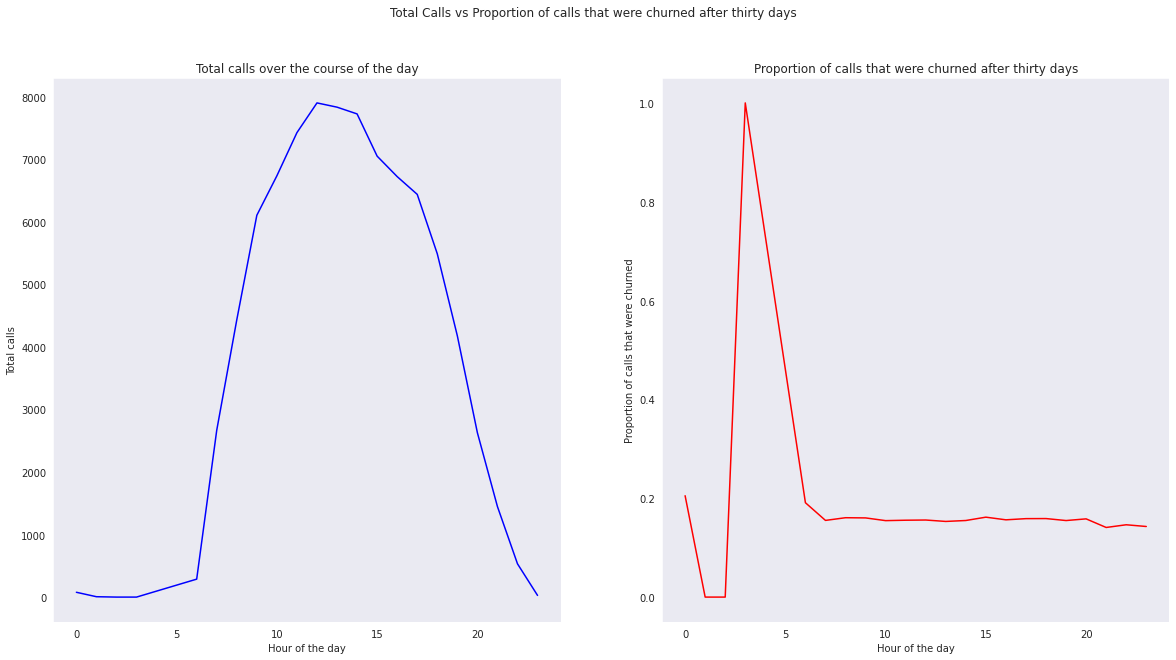

In [16]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20,10))
fig.suptitle('Total Calls vs Proportion of calls that were churned after thirty days')

sns.lineplot(ax = ax1, x = "time_of_day", y = "total_calls", data = hour_df, color = "blue");
ax1.set_ylabel('Total calls');
ax1.set_xlabel('Hour of the day');
ax1.set_title('Total calls over the course of the day');

sns.lineplot(ax = ax2, x = "time_of_day", y = "prop_accepted", data = hour_df, color = "red");
ax2.set_ylabel('Proportion of calls that were churned');
ax2.set_xlabel('Hour of the day');
ax2.set_title('Proportion of calls that were churned after thirty days');

In [17]:
fig.savefig("call30.png")

### 90 day Churn Hourly Analysis

In [18]:
hour_df = ninety_day.groupby(["time_of_day","ninety_day_churn"], as_index = False).size()

In [19]:
hour_df = hour_df.pivot_table(index = "time_of_day", values = "size", columns = "ninety_day_churn")
hour_df = hour_df.fillna(0)
hour_df["total_calls"] = hour_df[0] + hour_df[1]
hour_df["prop_accepted"] = hour_df.loc[:,1]/(hour_df.loc[:,0] + hour_df.loc[:,1])
hour_df["time_of_day"] = hour_df.index
hour_df = hour_df.reset_index(drop = True)
hour_df = hour_df.rename_axis(None, axis=1)

In [20]:
mmscale = MinMaxScaler()

In [21]:
hour_df["total_prop"] = mmscale.fit_transform(np.array(hour_df["total_calls"]).reshape(-1,1))

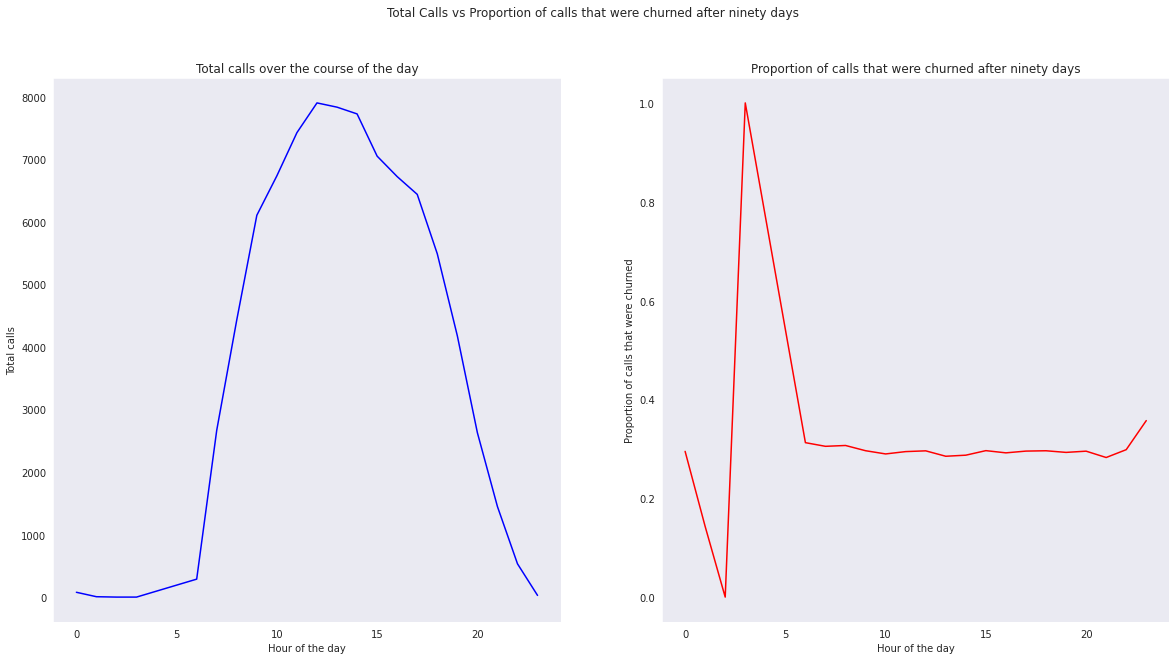

In [22]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20,10))
fig.suptitle('Total Calls vs Proportion of calls that were churned after ninety days')

sns.lineplot(ax = ax1, x = "time_of_day", y = "total_calls", data = hour_df, color = "blue");
ax1.set_ylabel('Total calls');
ax1.set_xlabel('Hour of the day');
ax1.set_title('Total calls over the course of the day');

sns.lineplot(ax = ax2, x = "time_of_day", y = "prop_accepted", data = hour_df, color = "red");
ax2.set_ylabel('Proportion of calls that were churned');
ax2.set_xlabel('Hour of the day');
ax2.set_title('Proportion of calls that were churned after ninety days');

In [23]:
fig.savefig("call90.png")